# Project: Most likely day of the week a vehicle accident will occur for a given month and person’s profile
### Name: Brandon Takli
### Student ID: 40124336
### Date Submitted: April 10, 2023

## **Abstract**
The goal of this project is to use the `2019 National Collision Database` provided on `open.canada.ca` to determine, given some attributes including but not limited to age, sex, type of vehicle being driven and the month, the most likely day of the week that person would end up in a vehicle accident. This data could be used alongside traditional risk assessment tools and weather observations to determine risk for a person driving in Canada for a given month, allowing them to be more informed before driving and to plan carefully.

The database mentioned contains data on all police-reported vehicle accidents on public roads in Canada. With over 272000 rows, it allows for ample training and test set size. 

The methods used include training 16 different ML models of type SVM, decision tree, random forest and various neural networks, paired with gridsearch for hyperparameter searching, dropout in neural networks, tree-based feature selection, one-hot encoding and various preprocessing techniques to achieve the best results possible.

The results have the random forest model paired with gridsearch and feature selection outperforming all others, yielding an accuracy of 47% and near identical F1 score. While this does not initially seem impressive, given that we have 7 classes (Monday - Sunday) to predict, we greatly outperform the random guess of 1/7, and it leads to a hopeful conclusion that given more time, training and testing a better model can be produced using this data.



## **Introduction**

The problem to be solved with this project is the issue of determining the most likely day of the week for a vehicle accident in a given month given a profile of a person, their vehicle and some external conditions. This serves as a sort of experiment related to risk calculations based on data, taking the basic idea from the way insurance companies calculate risk for an individual and determine their insurance rate. Of course, the results determined here are only part of the picture (the dataset does not include holidays, traffic concentration, etc.), but the results should still be interesting and provide insight on factors that may affect the likelihood of an accident.

This problem is important, as it allows insurance companies to determine risk for those they are insuring using large and complex datasets, allows for businesses to ensure the safety of their delivery drivers by coordinating delivery days based on risk calculations, and can also be used by concerned motorists who wish to be more informed of the risk as they make transportation decisions.

There are similar (but not exactly the same) types of problems that have been analysed before, such as traffic accident hotspot prediction and crash severity prediction [1][2]. These approaches use accident data and various supervised ML models such as decision trees, logistic regression, as well as the unsupervised DBSCAN model. The basic idea of both of these projects was using existing data to find a set of influential factors to classify the severity of an accident, as well as to determine future likelihood of an accident based on locations. The major differences with my approach compared to existing projects are: The location of data collection (Canada instead of Portugal and Saudi Arabia) as well as the actual output of the model being the day a person is most likely to get into an accident instead of hotspots or severity prediction. This makes my approach unique amongst the others, as it is not something that I have found in my research.

My approach to this problem is to train a machine learning multi-class classification model on the dataset, which outputs the most likely day for a vehicle collision given the input features mentioned in earlier sections. Classification is the most appropriate form of ML algorithm because the output values are not continuous as they would be in a regression problem: We have a total of 7 classes, 1 for each day of the week (Monday-Sunday). Multiple models are going to be considered, using both `scikit-learn` and `PyTorch` and their performances compared.

The main challenges of this project are related to selecting appropriate features to be used in the machine learning model so as to not overly correlate (e.g does the vehicle year need to be included?). Finally, the dataset needs to be trimmed of incomplete entries. 

The dataset being used is the `2019 National Collision Database from open.canada.ca` [3]. This dataset contains 23 columns and 272301 rows with various features (see data/data_dictionary for a full list and description of all features). We are taking the `C_WDAY` attribute to be our label, and the data is preprocessed to remove invalid samples and useless features such as vehicle ID and case number. 

**Results**

The results achieved were promising: **After testing 16 different ML models**, a maximum accuracy and F1 score of ~47% was achieved with the random forest model and feature selection, this is impressive considering we have 7 classes to predict in this multi-class classification problem: We are greatly outperforming the 1/7 (14%) accuracy of a random guess.

The confusion matrix of our best model, feature_selection_random_forest is as follows:

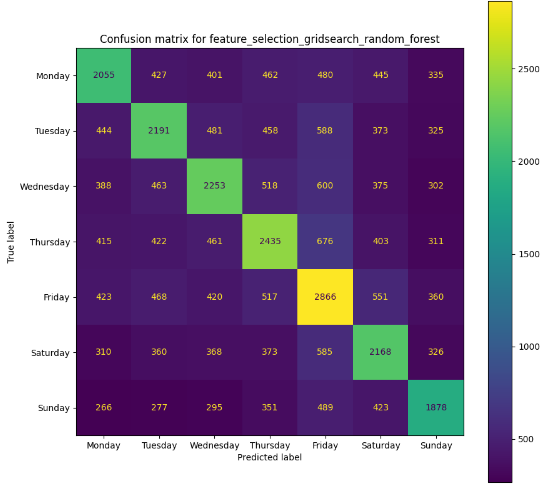

Which shows that by far the largest proportion of predictions for each class are correct. More confusion matrices can be found in the **Experimental Results** section of this notebook.


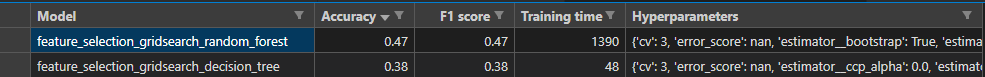

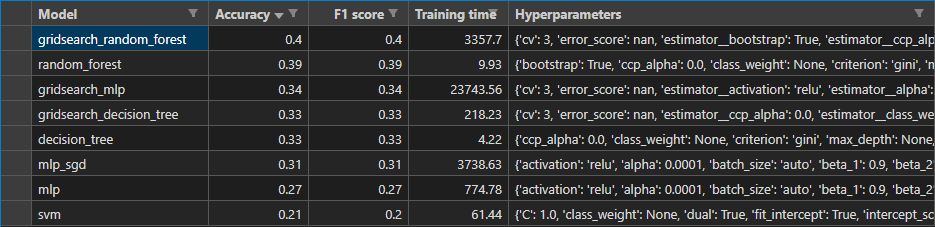

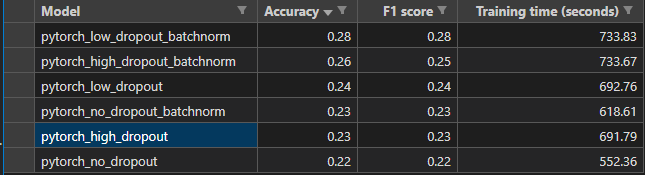

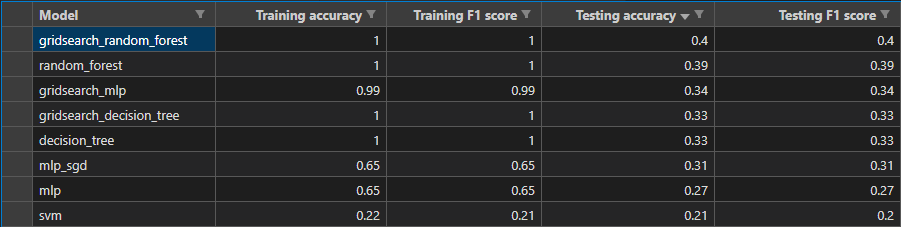

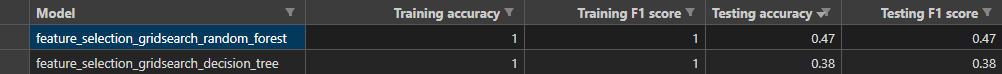

Our results show that the tree-based models consistently outperformed the neural network models, and trained in less time. Given that all the data is categorical in our dataset, this was expected, but the degree of difference was surprising. 

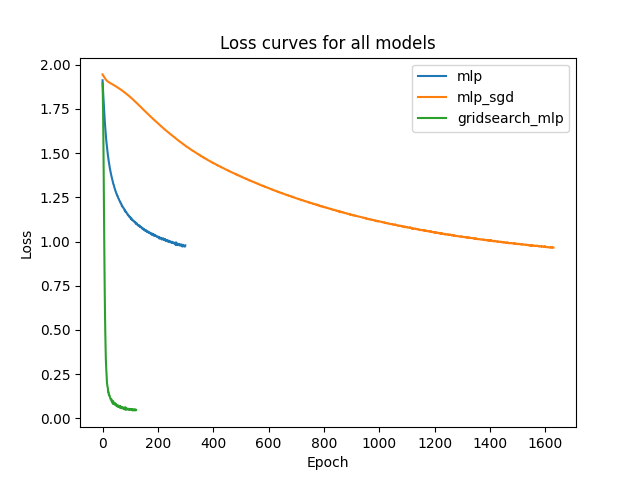

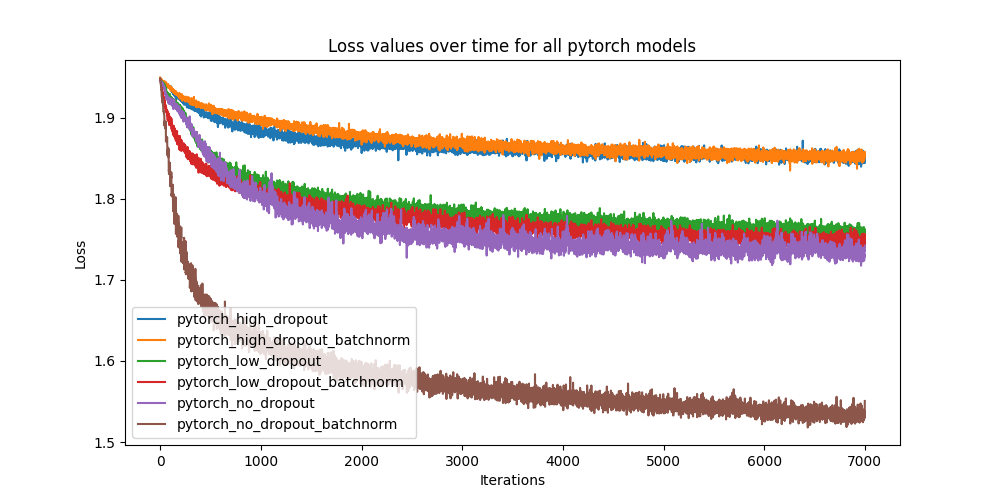

The loss curves here show that the tests done with `PyTorch` were able to learn the datasets far less well than those done with `scikit-learn`. Dropout in the cases of `PyTorch` did not help our data. More discussion is found in the **Experimental Results** section of this notebook.



## **Methodology**
This project builds on approaches from other sources on traffic accident hotspot prediction and crash severity prediction in that it leverages multiple machine learning models, particularly Decision Trees and Random Forests [1][2]. It is unique in terms of the actual models used and the dataset, having come from the government of Canada's website and not being advertized or specifically assembled for ML purposes. Furthermore, no other existing approach in literature attempts to predict the day of the week in a month an accident is most likely to occur, making this project unique and original in its goals.

### Examining the Dataset:
#### Initial Considerations:
The dataset being used for this project is the **2019 National Collision Database** provided on **open.canada.ca**. The dimensions of this data are 272301 rows and 23 columns. There are however certain columns that can be dropped before running profiling tools:
1. C_YEAR: All the data is from 2019, so including C_YEAR is a waste of computation time.
2. P_ID: This is the Person ID, which is irrelevant for us.
3. V_ID: Vehicle ID number, also irrelevant and can result in overfitting
4. C_CASE: Case number, irrelevant for our purposes.

#### Running Data Profiling:
Using [ydata-profiling](https://github.com/ydataai/ydata-profiling) in order to profile our data, we can get some better insights into the dataset and potential items that need to be changed. The raw data profile report is available in the reports/raw_data_profile.html file.

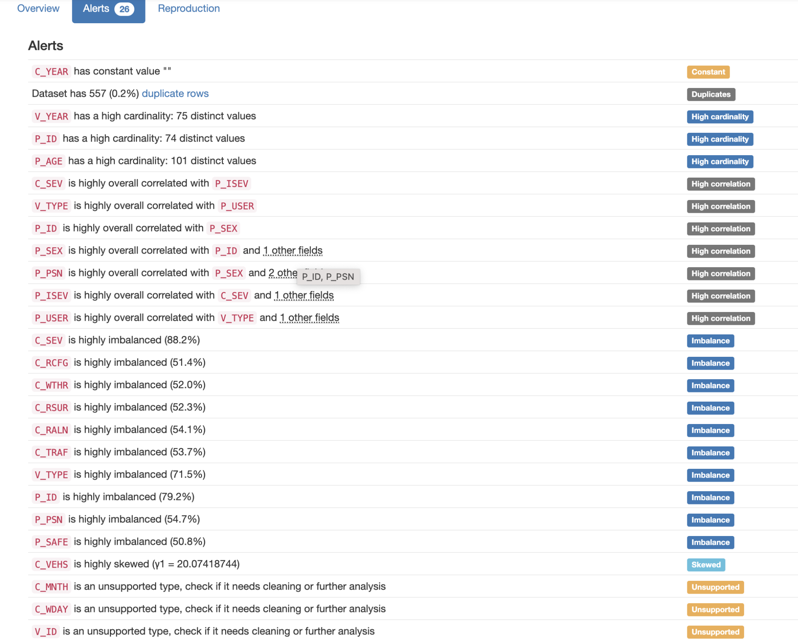

From this we can see that many of our fields are highly imbalanced. The level of imbalance can be quite severe:

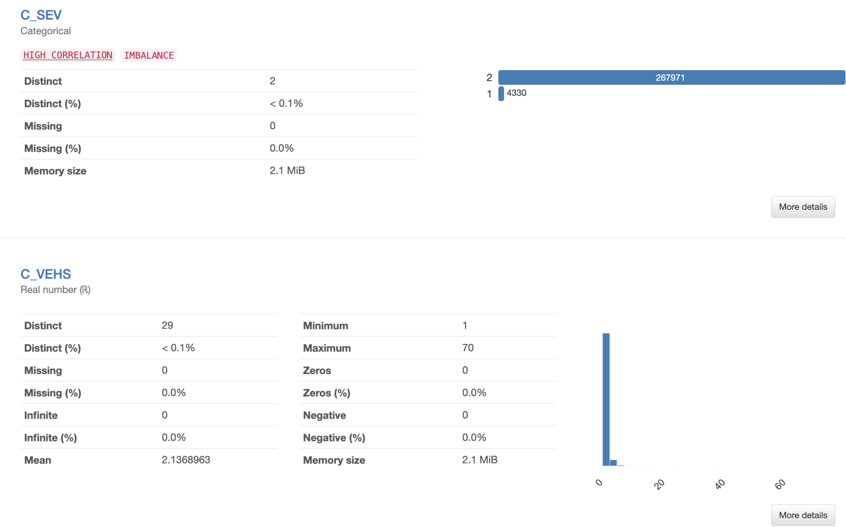

And finally, here's an overall heatmap of correlation:

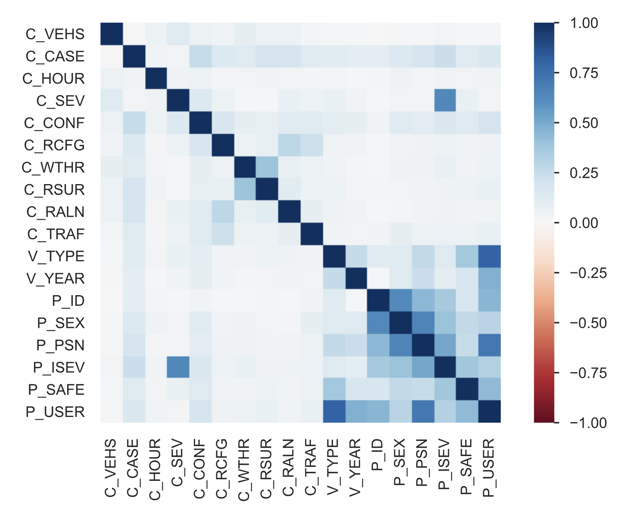

Furthermore, the profiler shows that C_MNTH and C_WDAY are not in a supported format. This is because while most columns are numerical, some have unknown values which are represented by strings such as 'U' or 'UU'. Rows containing these and other strings denoting unknown/uncollected values will need to be dropped.

#### Preprocessing

The data is preprocesssed by:
- Dropping the columns specified in columns_to_drop (for our tests, we dropped `['C_SEV', 'P_SAFE']` (crash severity and safety equipment) as they were not useful for determining the day of an accident)
- Dropping the C_YEAR, C_CASE, P_ID, V_ID columns
- Dropping rows with missing/unknown values

Our label `C_WDAY` was extracted from the dataset and put into its own list.

In order to prepare the data for the models, `scikit-learn` was used to make an 80/20 train/test split, and the data was one-hot encoded since it is all categorical.


### Best Model

In general, the best models were all tree-based models. In particular `random forest` performed the best.

More specifically, the model `feature_selection_gridsearch_random_forest` performed the best with 47% accuracy and F1 Score. It was made using both gridsearch and automatic tree based feature selection thanks to `sklearn`.

The following demonstrates the hyperparameters used to train the best model

```
random_forest_hyperparameters = {
    "n_estimators": [10, 500],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 1, 5],
    "max_features": [None, "sqrt", "log2"],
    "n_jobs": [-1],
    "random_state": [0],
    "verbose": [True],
}

"feature_selection_gridsearch_random_forest": sklearn.model_selection.GridSearchCV(base_random_forest, random_forest_hyperparameters, cv=3, verbose=True, n_jobs=-1)

#Feature selection:
clf = sklearn.ensemble.ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
X_new_train = model.transform(X_train)
X_new_test = model.transform(X_test)
```

The actual sselected hyperparameters are as follows:
- 'n_estimators': 500
- 'criterion': 'gini'
- 'max_depth': None
- 'max_features': 'sqrt'

This random forest uses 500 trees. The criterion is gini, meaning impurity at a node is calculated using the Gini Index. Each of these trees does not have a maximum depth and the maximum number of features to consider when looking for splits is the square root of the number of features.

This model was selected as the best of the 15 other models trained due to its higher accuracy and F1 score. See the tables above in the Introduction section or down in the Experimental Results section for views of the table, or alternatively look at the saved data in the reports/ directory of the project folder.


## **Experimental Setup**

The dataset used in this experiment was the `2019 National Collision Database from open.canada.ca` [3]. This dataset contains 272301 rows and 23 columns. The columns are as follows.

- C_YEAR: Year of the accident
- C_MNTH: Month of the accident
- C_WDAY: Day of the week of the accident (1 = Monday, 7 = Sunday))
- C_HOUR: Hour of the accident (00 = midnight to 0:59, 23:00 - 23:59)
- C_SEV: Severity of the accident
- C_VEHS: Number of vehicles involved in the accident
- C_CONF: Configuration of the accident
- C_RCFG: Road configuration
- C_WTHR: Weather conditions
- C_RSUR: Road surface conditions
- C_RALN: Road alignment
- C_TRAF: Traffic control configuration
- V_ID: Vehicle ID
- V_TYPE: Type of vehicle
- V_YEAR: Year of vehicle
- P_ID: Person ID
- P_SEX: Sex of the person
- P_AGE: Age of the person
- P_PSN: Position of the person in the vehicle
- P_ISEV: Injury severity of the person
- P_SAFE: Safety equipment used by the person
- P_USER: Type of user
- C_CASE: Case number

Clearly, C_CASE, P_ID, V_ID and C_YEAR are not going to be helpful and are automatically removed (C_YEAR is always 2019). 

The machine learning techniques used were as follows:
- One-Hot Encoding data (all data is categorical).
- Train/Test Split of data at 80%/20%.
- Use of tree-based models (decision trees, random forests).
- Use of GridSearch to find hyperparameters.
- Use of feature selection techniques to improve performance by selectively dropping features.
- Use of Dropout and BatchNorm in PyTorch Neural Networks.
- Comparisons of Training and Testing accuracy, Confusion matricies and loss curves during training

The Hyperparameters used are present in the result csv files located in the reports directory of the project folder and can also be found in the code. 

Typically, 3-5 hidden layers were used for NN models, varying from size 100-1000. No limits were placed on the depth of the tree based models.

Figures, data and other visuals can be seen in the section below, as generated by code.

## **Experimental Results**
The main results of this experiment are the maximum 47% accuracy and F1 score of achieved with the random forest model and feature selection. 16 models were tested in total with accuracy ranging from ~20%-47%.

While 47% does seem low, it is important to note that we have 7 classes to predict in this multi-class classification problem: We are greatly outperforming the 1/7 (14%) accuracy of a random guess. So we can say that these results give hope that with more time, experimentation and computational resources, a better model can be trained. 


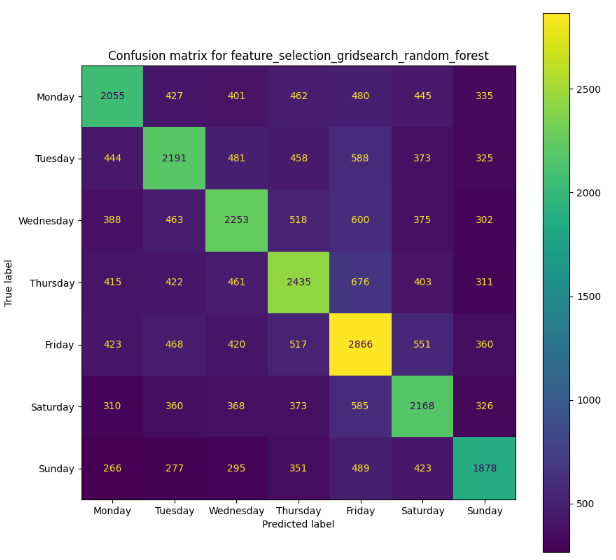

All confusion matrices produced had the single largest amount of predictions for a class being correct. This is a fairly clean result and is more impressive than the 47% accuracy would lead one to believe.


The results of the best model here did not reach the high accuracy of ~50-90% achieved in the other projects noted in literature, but it is important to note that their computational resources and dataset were far greater, and the goal of their projects were different (traffic hotspots versus prediction of the day of the week) [1][2].

Many more plots, figures and tables can be seen in the code section below, with many explanations provided along the way.



### **Code:**

Below is the code used to preprocess the data, train and test all the models of interest, as well as output the results into a series of files.

Both Scikit-learn and Pytorch are used here, with scikit used to get an initial idea and to run the Decision Trees and Random Forest, and Pytorch to attempt to improve the results of the Neural Networks with the greater customizability it offers.

**The cell directly below is responsible for cloning the code from my GitHub repository for my functions file.** This was done to keep the notebook code clean and offer more readability. All the functions are properly commented and offer type hints.

In [ ]:
!rm -rf COMP432-Project/
!git clone https://github.com/btakli/COMP432-Project
%pip install -r ./COMP432-Project/requirements.txt

In [85]:
# Ensure changes in the functions.py file are reflected in the notebook
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import functions as f
import matplotlib.pyplot as plt
import pandas as pd
import torch
#import autosklearn.classification as autosklearn
import sklearn
import sklearn.ensemble
from sklearn.feature_selection import SelectFromModel
import sklearn.model_selection
import sklearn.neural_network
import sklearn.svm
import sklearn.tree
from IPython.display import Image, display
from sklearn.metrics import ConfusionMatrixDisplay


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Preparing Data:

The cell below uses the `f.prepare_data()` function to prepare training and test sets for both the labels and features. The features are one hot encoded as they are all categorical.

**NOTE**: All files will be outputted into the `COMP432-Project` directory. To save time, this can be changed by specifying the file paths below if need be.

In [69]:
# Change working directory to the project folder,
# given that we are importing it from GitHub.
# Should only switch if the folder exists.
if os.path.exists('./COMP432-Project'):
    os.chdir('./COMP432-Project')


# Prepare data
X_train, X_test, y_train, y_test = f.prepare_data(
    columns_to_drop=['C_SEV', 'P_SAFE'])

# Prepare file paths
# Get parent directory of src
parent_dir = Path().resolve()

model_folder_path = os.path.join(parent_dir, 'models')

test_result_file = os.path.join(parent_dir, 'reports', 'test_results_sklearn.csv') # For sklearn models

test_result_file_pytorch = os.path.join(parent_dir, 'reports', 'test_results_pytorch.csv') # for pytorch models

training_and_testing_results_file = os.path.join(
    parent_dir, 'reports', 'training_and_testing_comparison_results.csv')


/Users/phantomex2011/Documents/GitHub/COMP432-Project/functions.py:49: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Raw data dimensions: [272301 x 23]
   C_YEAR C_MNTH C_WDAY C_HOUR  C_SEV  C_VEHS C_CONF C_RCFG C_WTHR C_RSUR  \
0    2019      1      1     11      2       2     32      1      1      5   
1    2019      1      1     11      2       2     32      1      1      5   
2    2019      1      1     11      2       2     32      1      1      5   
3    2019      1      1     11      2       2     32      1      1      5   
4    2019      1      1     16      2       2     32      1      2      5   

   ... V_TYPE V_YEAR P_ID P_SEX P_AGE P_PSN P_ISEV P_SAFE P_USER   C_CASE  
0  ...      1   2015    1     M    56    QQ      1      2      U  2681651  
1  ...      1   2015   UU     U    UU    UU      U     UU      U  2681651  
2  ...      1   2010    1     F    30    11      2      2      1  2681651  
3  ...      1   2010    2     U     1    QQ      N     NN      U  2681651  
4  ...      1   2007    1     F    27    11      2      2      1  2681652  

[5 rows x 23 columns]

Data size reduction: 1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/opt/homebrew/Caskroom/miniconda/base/envs/comp432_project/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could n

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now we can examine the changes made after preprocessing the data:

First of all, from our results we can see the following:

```
Data size reduction: 104498 dropped rows, and 6 dropped columns
yields a data size reduction of 38.38% of rows, and 26.09% of columns
```

After preprocessing and eliminating rows with unknown values, we manged to reduce our sample size by 38.38%. This shows how much of the data contained unknown features and shows the usefulness of preprocessing our data.

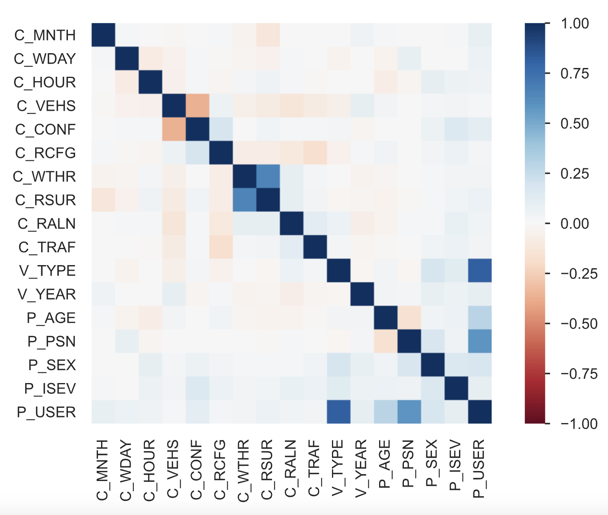

We can also see here that our preprocessing efforts have helped reduce some overly high correlation in features.


Below are the models we are training first using `sklearn`. To save time, overwriting the output files and saved models is set to false by default, but they can be changed easily using the parameters in the `f.train_and_test_models()` function. The reason overwrite_output is set to false by default is that if we used a saved model and overwrote the output, we'd lose the training time value in our test results file, since we did not live train the model that run.

**IMPORTANT NOTE:**

random_forest does not have a saved model uploaded due to the large size of it not being supported on GitHub. Training time very quick however. The results are still saved in the `test_results.csv file.`

#### Training Models

In [70]:
models_to_train = {
    "decision_tree": sklearn.tree.DecisionTreeClassifier(random_state=0),
    "mlp": sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=1000, random_state=0, verbose=True),
    "random_forest": sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0, verbose=True, n_jobs=-1),
    "svm": sklearn.svm.LinearSVC(random_state=0, verbose=True),
    "mlp_sgd": sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=5000, random_state=0, verbose=True, solver="sgd"),
}

# Train and test models
f.train_and_test_models(X_train, X_test, y_train, y_test, model_folder_path,
                        models_to_train, test_result_file, overwrite_output=False, overwrite_saved_models=False)


Training model decision_tree...
Model decision_tree already exists. Set overwrite=True to overwrite the model.
Done!
Training model mlp...
Model mlp already exists. Set overwrite=True to overwrite the model.
Done!
Training model random_forest...
Model random_forest already exists. Set overwrite=True to overwrite the model.
Done!
Training model svm...
Model svm already exists. Set overwrite=True to overwrite the model.
Done!
Training model mlp_sgd...
Model mlp_sgd already exists. Set overwrite=True to overwrite the model.
Done!
Loading model decision_tree...
Testing model decision_tree...
Done!
Model decision_tree accuracy: 0.33, F1 score: 0.33
Model decision_tree already exists in test results file. Skipping...
Loading model mlp...
Testing model mlp...
Done!
Model mlp accuracy: 0.27, F1 score: 0.27
Model mlp already exists in test results file. Skipping...
Loading model random_forest...
Testing model random_forest...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


Done!
Model random_forest accuracy: 0.39, F1 score: 0.39
Model random_forest already exists in test results file. Skipping...
Loading model svm...
Testing model svm...
Done!
Model svm accuracy: 0.21, F1 score: 0.20
Model svm already exists in test results file. Skipping...
Loading model mlp_sgd...
Testing model mlp_sgd...
Done!
Model mlp_sgd accuracy: 0.31, F1 score: 0.31
Model mlp_sgd already exists in test results file. Skipping...


##### Hyperparameter search:

Next, a hyperparameter search is to be done in order to attempt to improve the performance of the models.

The `scikit-learn` `GridsearchCV` class uses cross validation, automatically choosing a portion of the training set to be the validation set for each run, thus a separate validation set does not need to be created.

###### IMPORTANT NOTE:
Given that this is a hyperparameter search, runtime is very long (aside from the decision tree). It is recommended to use the saved models for these, and once again random forest is not present in the saved models due to being too large, so you may remove it if you wish to run this on your own.

In [71]:
# Hyperparameter search:

# Hyperparameter seach dictionaries
mlp_hyperparameters = {
    "hidden_layer_sizes": [(100, 100, 100), (1000, 500, 100)],
    "max_iter": [1000],
    "random_state": [0],
    "verbose": [True],
    "solver": ["adam", "sgd"],
    "learning_rate": ["constant", "adaptive"],
}

decision_tree_hyperparameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 1,  5, 10],
    "min_samples_split": [2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "random_state": [0]
}

random_forest_hyperparameters = {
    "n_estimators": [10, 500],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 1, 5],
    "max_features": [None, "sqrt", "log2"],
    "n_jobs": [-1],
    "random_state": [0],
    "verbose": [True],
}

base_mlp = sklearn.neural_network.MLPClassifier(
    random_state=0, verbose=True)
base_decision_tree = sklearn.tree.DecisionTreeClassifier(random_state=0)
base_random_forest = sklearn.ensemble.RandomForestClassifier(
    random_state=0, verbose=True)

# Grid search uses cross validation to find the best hyperparameters, so we don't need to make a separate validation set.
models_to_train_search = {
    "gridsearch_mlp": sklearn.model_selection.GridSearchCV(base_mlp, mlp_hyperparameters, cv=3, verbose=True, n_jobs=-1),
    "gridsearch_decision_tree": sklearn.model_selection.GridSearchCV(base_decision_tree, decision_tree_hyperparameters, cv=3, verbose=True, n_jobs=-1),
    "gridsearch_random_forest": sklearn.model_selection.GridSearchCV(base_random_forest, random_forest_hyperparameters, cv=3, verbose=True, n_jobs=-1)
}

f.train_and_test_models(X_train, X_test, y_train, y_test, model_folder_path,
                        models_to_train_search, test_result_file, overwrite_output=False, overwrite_saved_models=False)


Training model gridsearch_mlp...
Model gridsearch_mlp already exists. Set overwrite=True to overwrite the model.
Done!
Training model gridsearch_decision_tree...
Model gridsearch_decision_tree already exists. Set overwrite=True to overwrite the model.
Done!
Training model gridsearch_random_forest...
Model gridsearch_random_forest already exists. Set overwrite=True to overwrite the model.
Done!
Loading model gridsearch_mlp...
Testing model gridsearch_mlp...
Done!
Model gridsearch_mlp accuracy: 0.34, F1 score: 0.34
Model gridsearch_mlp already exists in test results file. Skipping...
Loading model gridsearch_decision_tree...
Testing model gridsearch_decision_tree...
Done!
Model gridsearch_decision_tree accuracy: 0.33, F1 score: 0.33
Model gridsearch_decision_tree already exists in test results file. Skipping...
Loading model gridsearch_random_forest...
Testing model gridsearch_random_forest...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.4s finished


Done!
Model gridsearch_random_forest accuracy: 0.40, F1 score: 0.40
Model gridsearch_random_forest already exists in test results file. Skipping...


#### Results:

In this results section, we are comparing the training and testing accuracy of the models, as well as plotting the loss curves for compatible models. We will also print out the tables here for easier viewing, but they are best viewed in full detail in the CSV files for the hyperparameters, as the values are quite long.

Comparing training and testing accuracy and f1-score...
Model decision_tree training accuracy: 1.00, training F1 score: 1.00
Model decision_tree testing accuracy: 0.33, testing F1 score: 0.33
Model mlp training accuracy: 0.65, training F1 score: 0.65
Model mlp testing accuracy: 0.27, testing F1 score: 0.27


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


Model random_forest training accuracy: 1.00, training F1 score: 1.00
Model random_forest testing accuracy: 0.39, testing F1 score: 0.39
Model svm training accuracy: 0.22, training F1 score: 0.21
Model svm testing accuracy: 0.21, testing F1 score: 0.20
Model mlp_sgd training accuracy: 0.65, training F1 score: 0.65
Model mlp_sgd testing accuracy: 0.31, testing F1 score: 0.31
Model is a gridsearch object. Getting best estimator...
Model gridsearch_mlp training accuracy: 0.99, training F1 score: 0.99
Model gridsearch_mlp testing accuracy: 0.34, testing F1 score: 0.34
Model is a gridsearch object. Getting best estimator...
Model gridsearch_decision_tree training accuracy: 1.00, training F1 score: 1.00
Model gridsearch_decision_tree testing accuracy: 0.33, testing F1 score: 0.33
Model is a gridsearch object. Getting best estimator...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.5s finished


Model gridsearch_random_forest training accuracy: 1.00, training F1 score: 1.00
Model gridsearch_random_forest testing accuracy: 0.40, testing F1 score: 0.40
Loading model decision_tree...
Plotting loss curve for model decision_tree...
Model decision_tree does not have a loss curve. Skipping plotting...
Loading model mlp...
Plotting loss curve for model mlp...
Loading model random_forest...
Plotting loss curve for model random_forest...
Model random_forest does not have a loss curve. Skipping plotting...
Loading model svm...
Plotting loss curve for model svm...
Model svm does not have a loss curve. Skipping plotting...
Loading model mlp_sgd...
Plotting loss curve for model mlp_sgd...
Loading model gridsearch_mlp...
Model is a gridsearch object. Getting best estimator...
Plotting loss curve for model gridsearch_mlp...
Loading model gridsearch_decision_tree...
Model is a gridsearch object. Getting best estimator...
Plotting loss curve for model gridsearch_decision_tree...
Model gridsearc

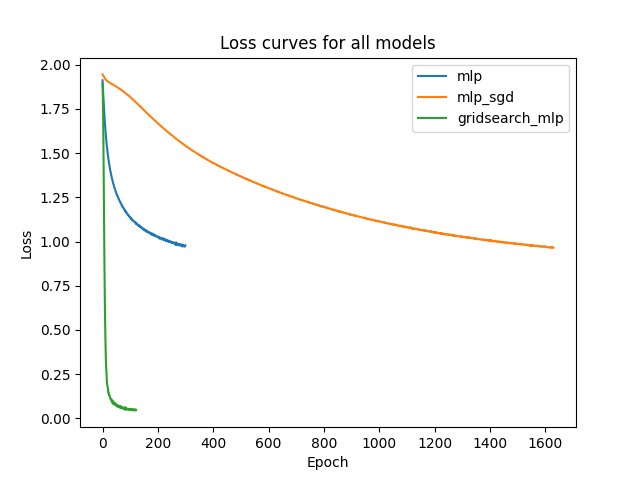

In [72]:
# Compare training and testing accuracy and f1-score for each model
print("Comparing training and testing accuracy and f1-score...")
for model_name in models_to_train | models_to_train_search:
    f.compare_training_and_testing_accuracy(model_name, model_folder_path, X_train, X_test, y_train, y_test,
                                            training_and_testing_results_file, overwrite_output=True)
# Plot the loss curve of each model
f.plot_loss_curves_overlapping(models_to_train | models_to_train_search, model_folder_path, os.path.join(
    parent_dir, 'reports', 'figures'))

# display the loss curve file generated
Image(filename=os.path.join(parent_dir, 'reports', 'figures', 'loss_curves_all_models.png'))


First of all, only the MLP objects had a loss curve attribute that we could plot here.

Here we can see the stark difference in loss curves between the models that use the Adam optimizer (both the regular mlp and gridsearch_mlp use Adam) and the model that uses SGD (Stochastic Gradient Descent).

In class, we learned that Adam tends to converge faster, and  these results prove this to a shocking degree. With gridsearch, the Adam MLP converges to near-zero in under 200 epochs, whereas SGD takes over 1600 epochs for much worse results. 

Clearly, the adaptive learning rate provided by Adam is well suited to this dataset, and helps converge much quicker. However it is worth noting that the SGD based model performed better on the test set than the Adam based mlp model with the same hidden layer sizes. This backs up the claims that SGD can generalize better than Adam in some cases [4].

We can now print the results of the CSV files for easier viewing:

In [73]:
print("Test results:")
pd.read_csv(test_result_file)

Test results:


,Model,Accuracy,F1 score,Training time,Hyperparameters
0,decision_tree,0.327344,0.327303,4.217583,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
1,mlp,0.272876,0.272978,774.775097,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
2,random_forest,0.387623,0.387389,9.933472,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
3,svm,0.206192,0.198527,61.440114,"{'C': 1.0, 'class_weight': None, 'dual': True,..."
4,mlp_sgd,0.310956,0.309954,3738.625330,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
5,gridsearch_mlp,0.339561,0.339592,23743.560000,"{'cv': 3, 'error_score': nan, 'estimator__acti..."
6,gridsearch_decision_tree,0.333989,0.334006,218.230000,"{'cv': 3, 'error_score': nan, 'estimator__ccp_..."
7,gridsearch_random_forest,0.401329,0.401033,3357.698025,"{'cv': 3, 'error_score': nan, 'estimator__boot..."


In [74]:
print("Training and testing comparison results:")
pd.read_csv(training_and_testing_results_file)

Training and testing comparison results:


,Model,Training accuracy,Training F1 score,Testing accuracy,Testing F1 score
0,decision_tree,0.999687,0.999687,0.327344,0.327303
1,mlp,0.653551,0.653976,0.272876,0.272978
2,random_forest,0.999687,0.999687,0.387623,0.387389
3,svm,0.215193,0.207893,0.206192,0.198527
4,mlp_sgd,0.651167,0.650455,0.310956,0.309954
5,gridsearch_mlp,0.992759,0.992760,0.339561,0.339592
6,gridsearch_decision_tree,0.999687,0.999687,0.333989,0.334006
7,gridsearch_random_forest,0.999687,0.999687,0.401329,0.401033


From here we can see that the **best models are the tree based models**, with gridsearch random forest having reached .4 accuracy and F1-score, and standard random forest having achieved a 0.38 score for accuracy and F1-score. Despite the massive jump in training time (9 seconds to 1 hour), the gridsearch only improved the performance by 1.36%. 

The biggest performance boost was the MLP model, which gained almost 6% accuracy after gridsearch was implemented. 

The important spot to look is at training accuracy vs testing accuracy: We can see that **The tree models, as well as gridsearch MLP are all severely overfitting**. With gridsearch we managed to get an incredible boost in training accuracy for MLP, but testing performance did not boost by that much. In the case of the tree models, accuracy remained identical in training, but test performance did very slightly increase.

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.3s finished


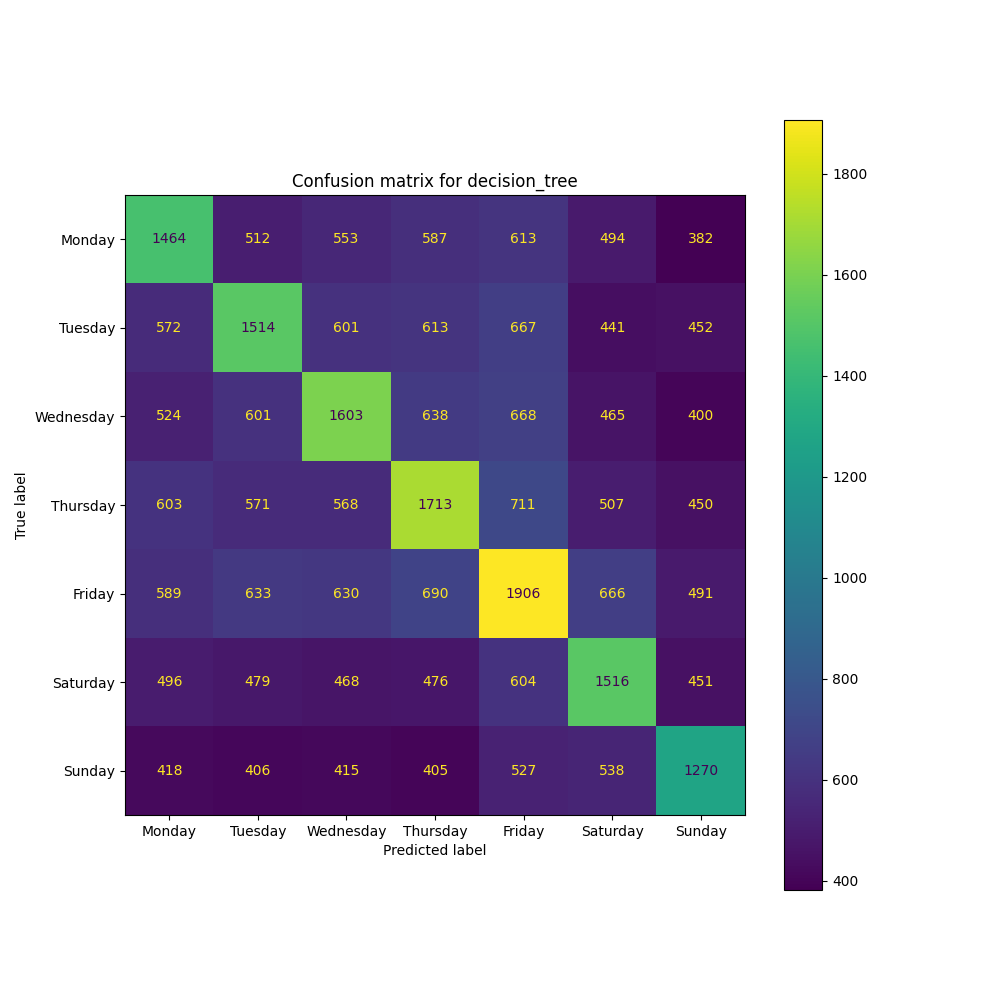

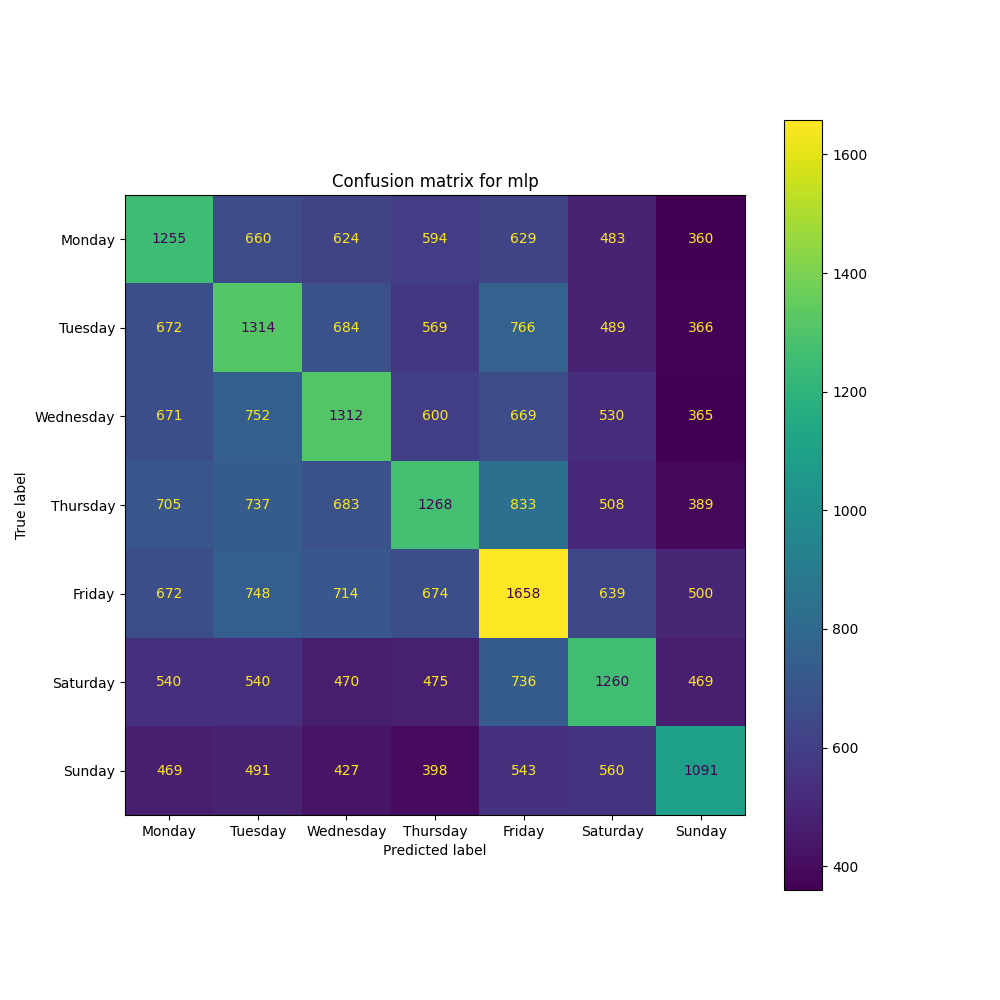

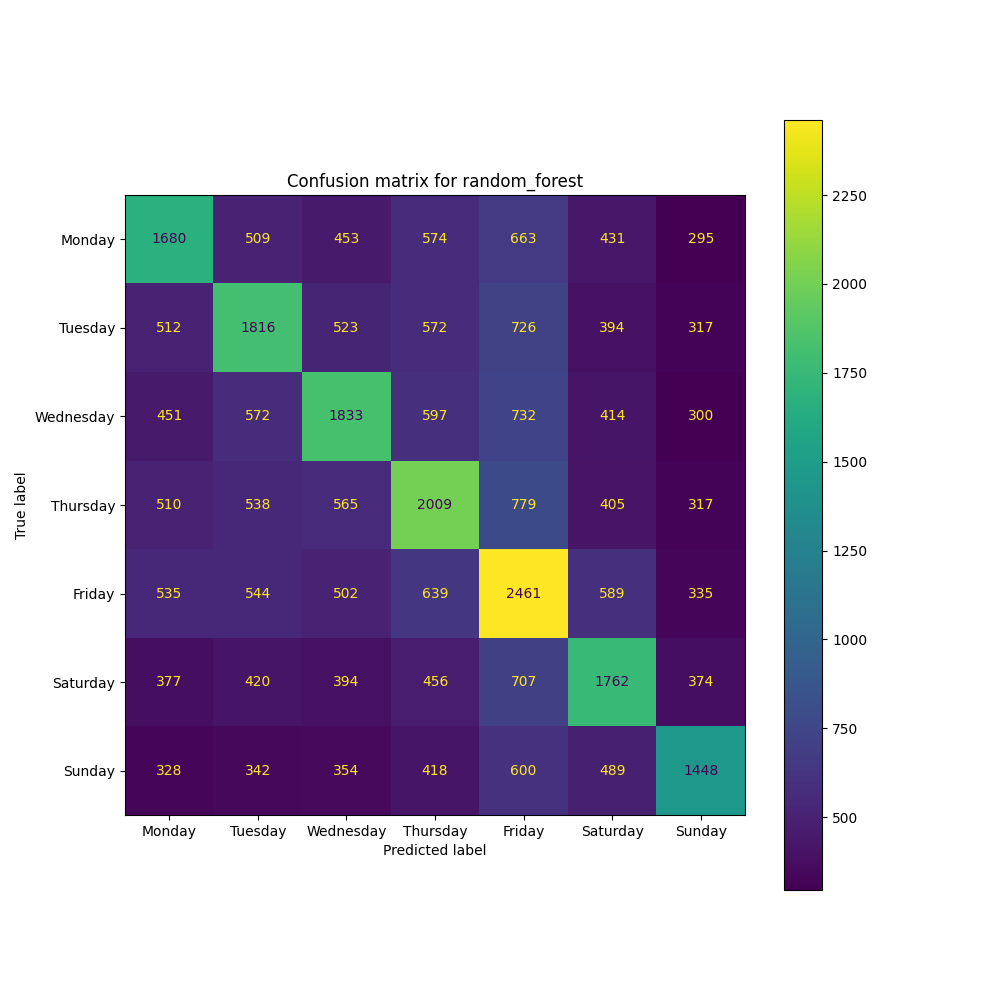

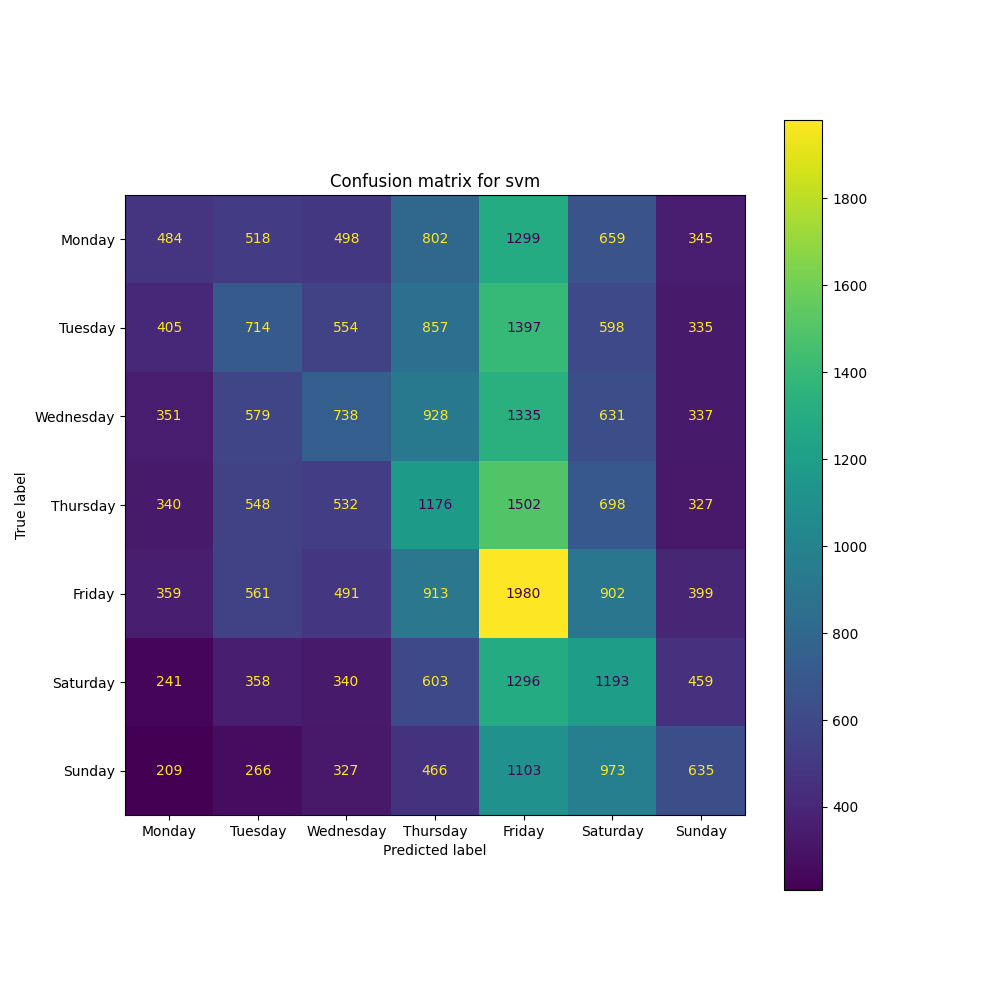

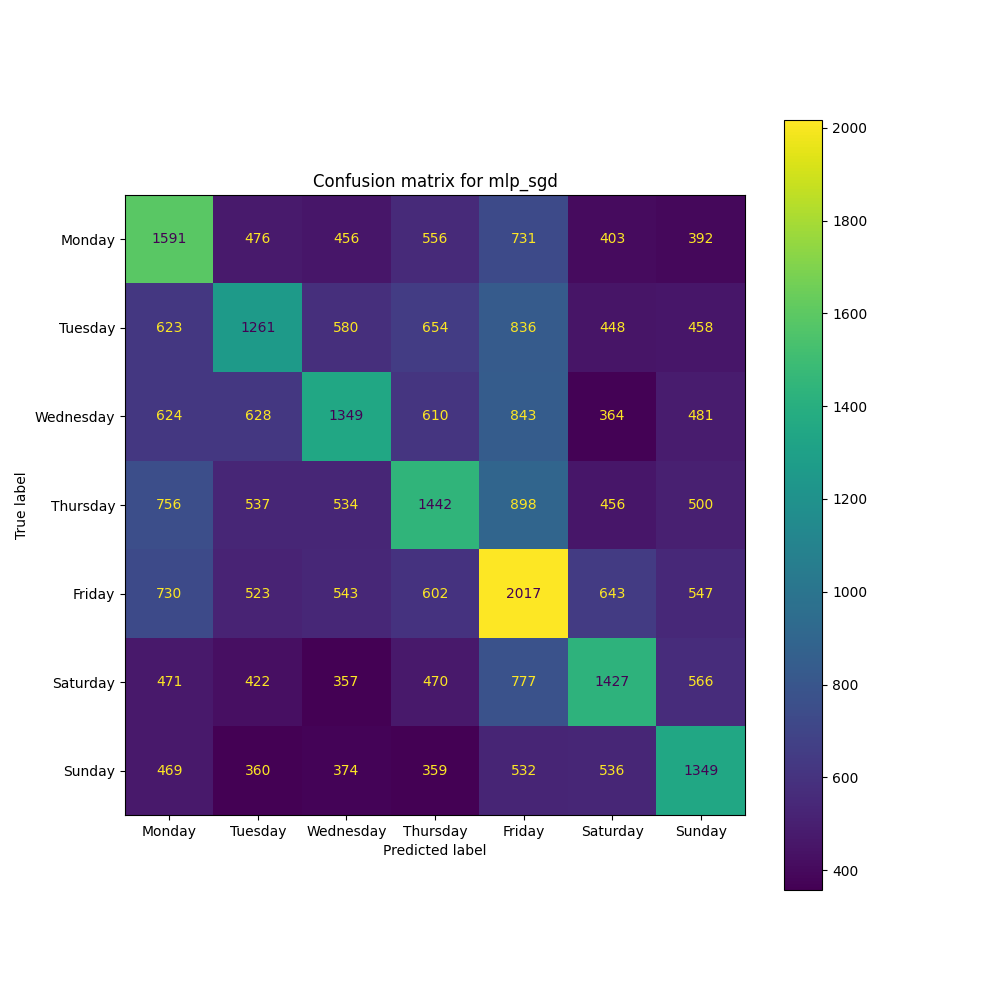

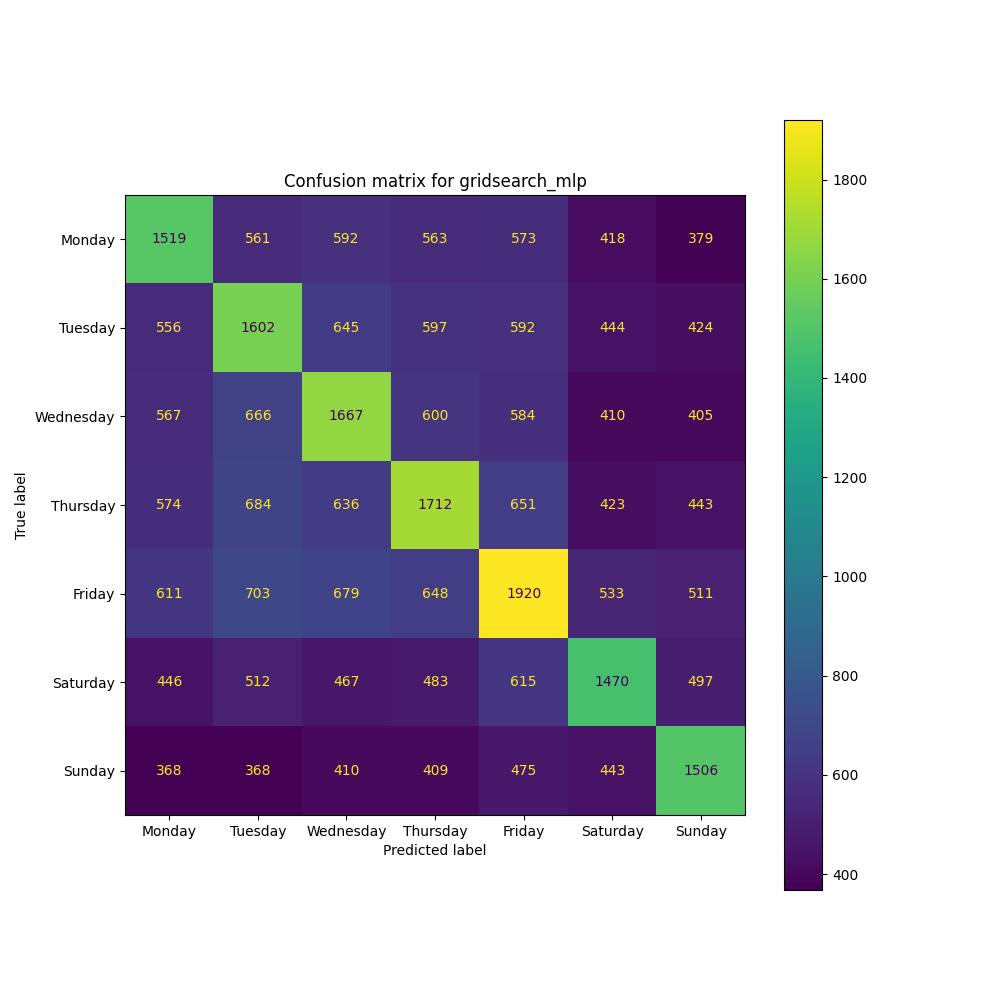

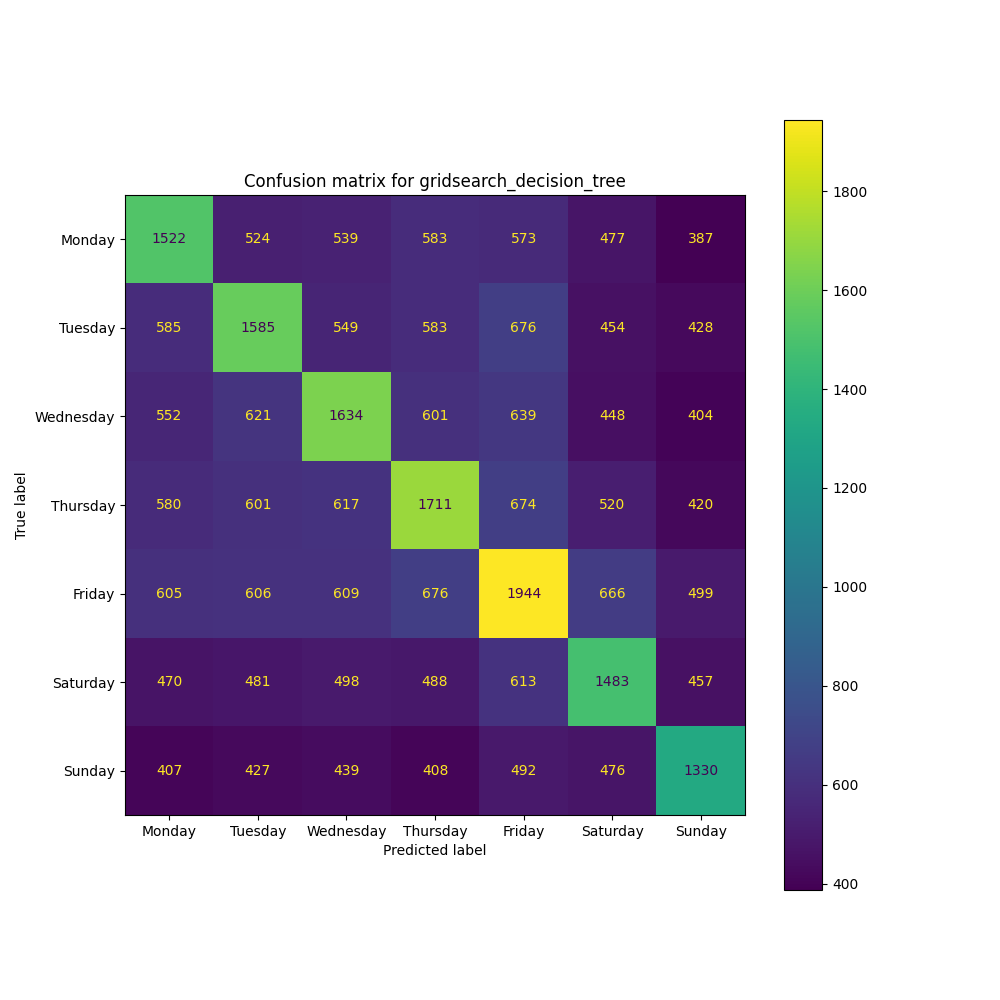

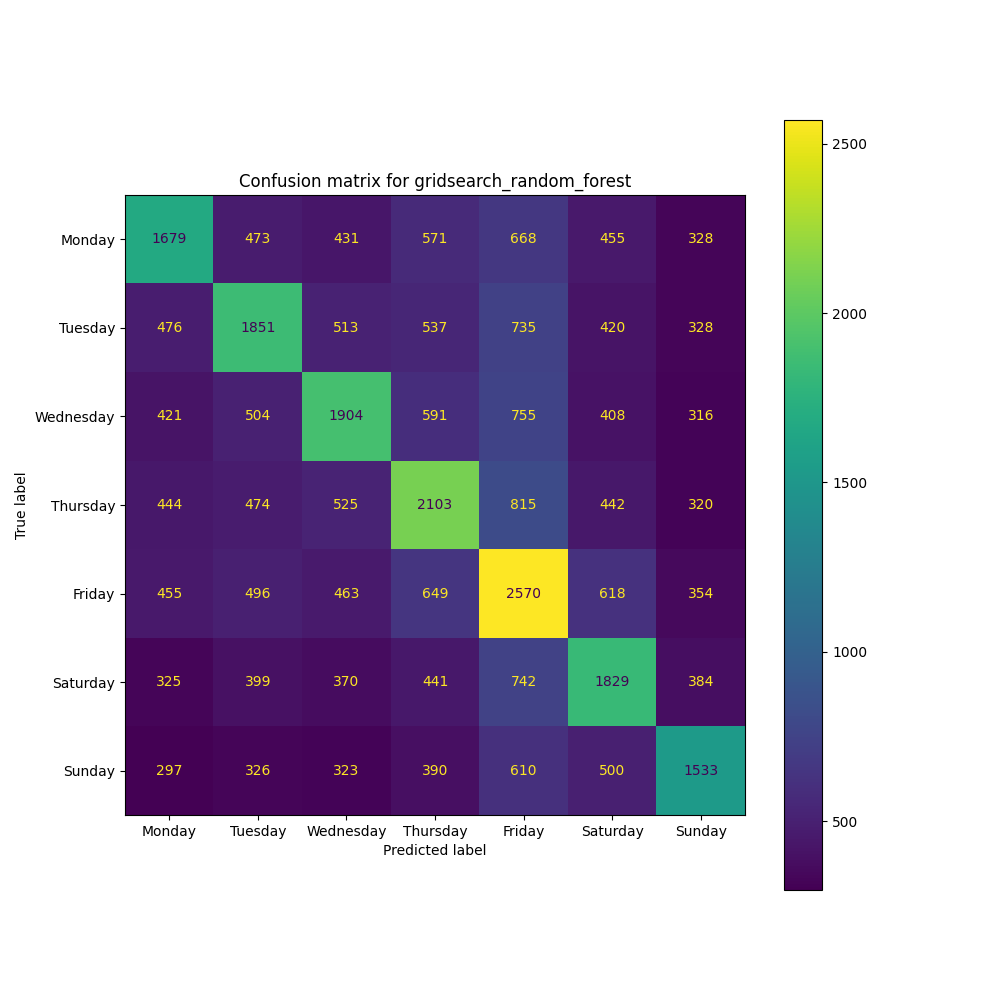

In [75]:
#Plot all confusion matricies
for model_name in models_to_train | models_to_train_search:
    model = f.load_model(model_name, model_folder_path)
    confusion_matrix = sklearn.metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], )
    confusion_matrix.ax_.set_title(f"Confusion matrix for {model_name}")

    confusion_matrix.figure_.set_size_inches(10, 10)

    # Save the confusion matrix to a file
    confusion_matrix.figure_.savefig(os.path.join(
        parent_dir, 'reports', 'figures', f'{model_name}_confusion_matrix.png'))

# display the confusion matrices side by side
for model_name in models_to_train | models_to_train_search:
    display(Image(filename=os.path.join(parent_dir, 'reports', 'figures', f'{model_name}_confusion_matrix.png'), width=700, height=700))

These confusion matricies tell an interesting story: In every single case (including the linear SVM, which was expected to have poor performance and was done as a test) the label predicted the most often is the correct one.

Looking at our best performing model gridsearch_random_forest, we can see that by far the single label predicted the most often for each class is the correct one.

One thing that we notice is that Friday tends to have the most samples predicted correctly across all models. Looking at our data profiling, we can see that Friday is the most common day for an accident, so this makes sense.

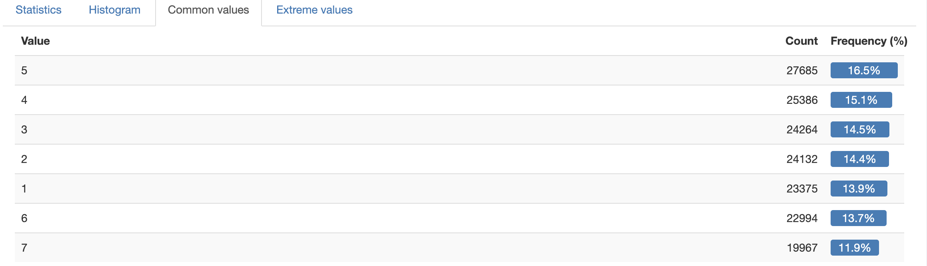

#### Tree-Based Feature Selection

Given that tree-based models random forest and decision tree have been our best models to date, it makes sense to attempt to do a Tree-Based Feature Selection run on our data to attempt to remove noise and improve performance [5].

In [88]:
print(f"Original shape of X_train: {X_train.shape}")

clf = sklearn.ensemble.ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
X_new_train = model.transform(X_train)
X_new_test = model.transform(X_test)

print(f"New shape of X_train: {X_new_train.shape}")

Original shape of X_train: (134242, 331)
New shape of X_train: (134242, 128)
New shape of X_test: (33561, 128)


We can now fit and test a new decision tree and random forest to these new feature sets:

In [91]:
feature_selection_test_result_file = os.path.join(
    parent_dir, 'reports', 'feature_selection_test_results.csv')

decision_tree_hyperparameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 1,  5, 10],
    "min_samples_split": [2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "random_state": [0]
}

random_forest_hyperparameters = {
    "n_estimators": [10, 500],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 1, 5],
    "max_features": [None, "sqrt", "log2"],
    "n_jobs": [-1],
    "random_state": [0],
    "verbose": [True],
}

base_decision_tree = sklearn.tree.DecisionTreeClassifier(random_state=0)
base_random_forest = sklearn.ensemble.RandomForestClassifier(
    random_state=0, verbose=True)

# Grid search uses cross validation to find the best hyperparameters, so we don't need to make a separate validation set.
feature_selection_models_to_train_search = {
    "feature_selection_gridsearch_decision_tree": sklearn.model_selection.GridSearchCV(base_decision_tree, decision_tree_hyperparameters, cv=3, verbose=True, n_jobs=-1),
    "feature_selection_gridsearch_random_forest": sklearn.model_selection.GridSearchCV(base_random_forest, random_forest_hyperparameters, cv=3, verbose=True, n_jobs=-1)
}

f.train_and_test_models(X_new_train, X_new_test, y_train, y_test, model_folder_path,
                        feature_selection_models_to_train_search, feature_selection_test_result_file, overwrite_output=False, overwrite_saved_models=False)




Training model feature_selection_gridsearch_decision_tree...
Model feature_selection_gridsearch_decision_tree already exists. Set overwrite=True to overwrite the model.
Done!
Training model feature_selection_gridsearch_random_forest...
Model feature_selection_gridsearch_random_forest already exists. Set overwrite=True to overwrite the model.
Done!
Loading model feature_selection_gridsearch_decision_tree...
Testing model feature_selection_gridsearch_decision_tree...
Done!
Model feature_selection_gridsearch_decision_tree accuracy: 0.38, F1 score: 0.38
Loading model feature_selection_gridsearch_random_forest...
Testing model feature_selection_gridsearch_random_forest...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.1s finished


Done!
Model feature_selection_gridsearch_random_forest accuracy: 0.47, F1 score: 0.47


In [94]:
# Print the test results
pd.read_csv(feature_selection_test_result_file)

,Model,Accuracy,F1 score,Training time,Hyperparameters
0,feature_selection_gridsearch_decision_tree,0.377790,0.377790,48,"{'cv': 3, 'error_score': nan, 'estimator__ccp_..."
1,feature_selection_gridsearch_random_forest,0.472155,0.471992,1390,"{'cv': 3, 'error_score': nan, 'estimator__boot..."


In [97]:
# Compare training and testing accuracy and f1-score for each model
print("Comparing training and testing accuracy and f1-score...")
training_and_testing_results_file_feature_selection = os.path.join(
    parent_dir, 'reports', 'training_and_testing_results_feature_selection.csv')
for model_name in feature_selection_models_to_train_search:
    f.compare_training_and_testing_accuracy(model_name, model_folder_path, X_new_train, X_new_test, y_train, y_test,
                                            training_and_testing_results_file_feature_selection, overwrite_output=True)


Comparing training and testing accuracy and f1-score...
Model is a gridsearch object. Getting best estimator...
Model feature_selection_gridsearch_decision_tree training accuracy: 1.00, training F1 score: 1.00
Model feature_selection_gridsearch_decision_tree testing accuracy: 0.38, testing F1 score: 0.38
Model is a gridsearch object. Getting best estimator...


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.6s finished


Model feature_selection_gridsearch_random_forest training accuracy: 1.00, training F1 score: 1.00
Model feature_selection_gridsearch_random_forest testing accuracy: 0.47, testing F1 score: 0.47


In [99]:
# print the training and testing comparison results
pd.read_csv(training_and_testing_results_file_feature_selection)

,Model,Training accuracy,Training F1 score,Testing accuracy,Testing F1 score
0,feature_selection_gridsearch_decision_tree,0.997601,0.997601,0.377790,0.377790
1,feature_selection_gridsearch_random_forest,0.997601,0.997601,0.472155,0.471992


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.3s finished


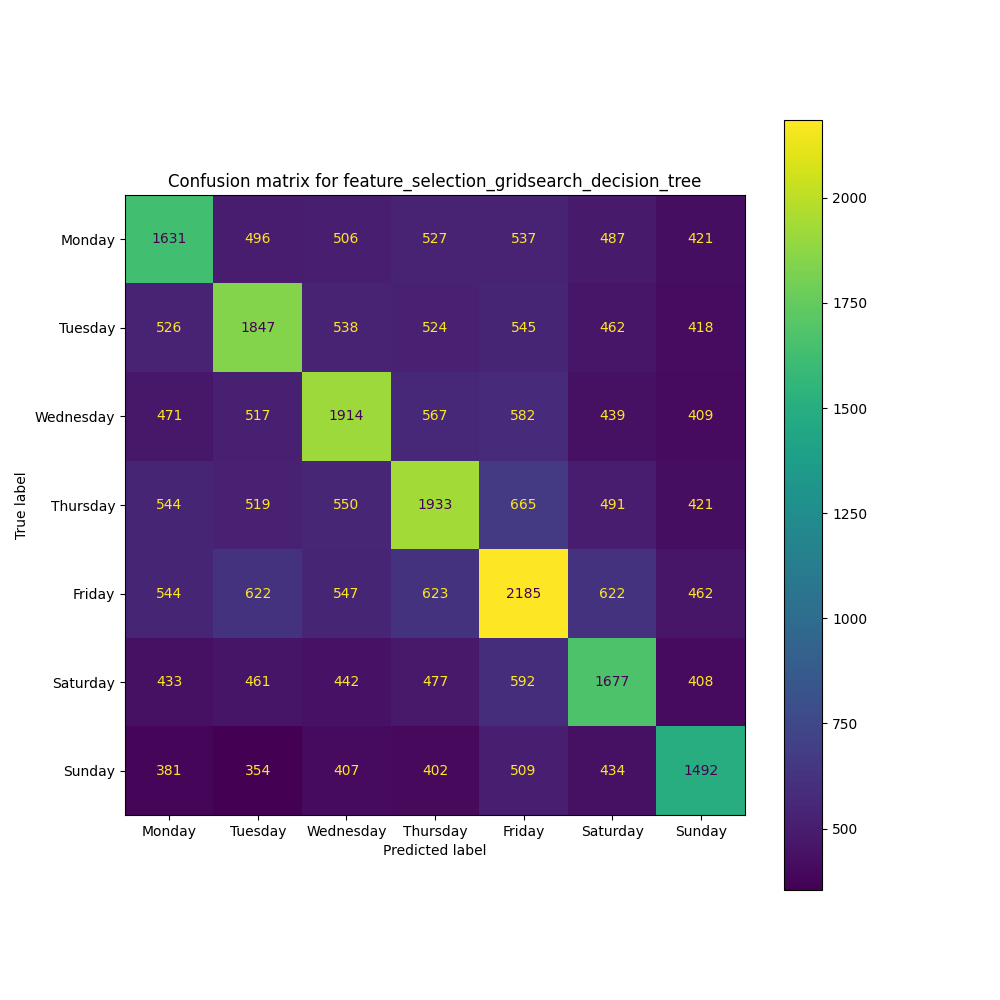

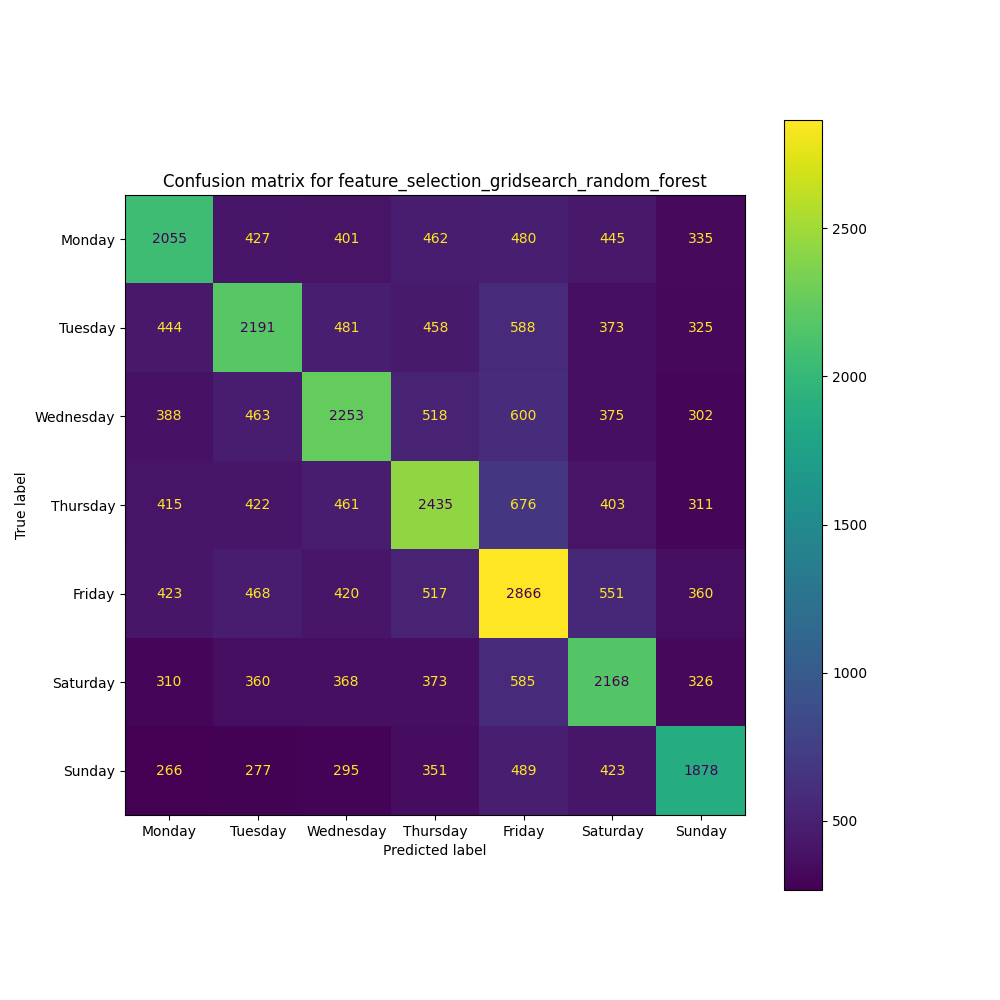

In [100]:
# Print the confusion matrix for each model
for model_name in feature_selection_models_to_train_search:
    model = f.load_model(model_name, model_folder_path)
    confusion_matrix = sklearn.metrics.ConfusionMatrixDisplay.from_estimator(model, X_new_test, y_test, display_labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], )
    confusion_matrix.ax_.set_title(f"Confusion matrix for {model_name}")

    confusion_matrix.figure_.set_size_inches(10, 10)

    # Save the confusion matrix to a file
    confusion_matrix.figure_.savefig(os.path.join(
        parent_dir, 'reports', 'figures', f'{model_name}_confusion_matrix.png'))

for model_name in feature_selection_models_to_train_search:
    display(Image(filename=os.path.join(parent_dir, 'reports', 'figures', f'{model_name}_confusion_matrix.png'), width=700, height=700))

Here we can see that while we are still overfitting, our performance is much better: Random Forest, which is our best model, jumped by over 7% in accuracy and F1 score. The usage of feature selection was a great boost in our performance.

#### PyTorch Neural Networks

We can now run a test with PyTorch Neural Networks using dropout, batch normalization in different combinations to see if we can help combat overfitting and achieve better results than the less customizable scikit-learn option could offer.

All Neural Networks below have the same layer sizes, they only differ in their dropout ratio and usage of batch normalization.

Inspiration for this code (particularly the `f.train_and_test_pytorch()` method) was taken from **Tutorial 4: Introduction to PyTorch**

**Note:** I am using CPU for this test due to the fact that I do not have a cuda enabled device. 

**Cuda is untested!** If it causes issues, use CPU instead.

In [101]:
# Create a PyTorch neural network with dropout and batch normalization
torch.manual_seed(0)
pytorch_models_to_train = {
    "pytorch_high_dropout": torch.nn.Sequential(
        # 331 features because of our one-hot encoding
        torch.nn.Linear(331, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        # 7 classes (days of the week: 1 = Monday, 2 = Tuesday, etc.)
        torch.nn.Linear(100, 7),
        torch.nn.Softmax(dim=1)
    ),
    "pytorch_high_dropout_batchnorm": torch.nn.Sequential(
        # 331 features because of our one-hot encoding
        torch.nn.Linear(331, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.5),
        # 7 classes (days of the week: 1 = Monday, 2 = Tuesday, etc.)
        torch.nn.Linear(100, 7),
        torch.nn.Softmax(dim=1)
    ),
    "pytorch_low_dropout": torch.nn.Sequential(
        # 331 features because of our one-hot encoding
        torch.nn.Linear(331, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        # 7 classes (days of the week: 1 = Monday, 2 = Tuesday, etc.)
        torch.nn.Linear(100, 7),
        torch.nn.Softmax(dim=1)
    ),
    "pytorch_low_dropout_batchnorm": torch.nn.Sequential(
        # 331 features because of our one-hot encoding
        torch.nn.Linear(331, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Dropout(0.1),
        # 7 classes (days of the week: 1 = Monday, 2 = Tuesday, etc.)
        torch.nn.Linear(100, 7),
        torch.nn.Softmax(dim=1)
    ),
    "pytorch_no_dropout": torch.nn.Sequential(
        # 331 features because of our one-hot encoding
        torch.nn.Linear(331, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.LeakyReLU(),
        # 7 classes (days of the week: 1 = Monday, 2 = Tuesday, etc.)
        torch.nn.Linear(100, 7),
        torch.nn.Softmax(dim=1)
    ),
    "pytorch_no_dropout_batchnorm": torch.nn.Sequential(
        # 331 features because of our one-hot encoding
        torch.nn.Linear(331, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.BatchNorm1d(100),
        torch.nn.LeakyReLU(),
        # 7 classes (days of the week: 1 = Monday, 2 = Tuesday, etc.)
        torch.nn.Linear(100, 7),
        torch.nn.Softmax(dim=1)
    )
}

loss_curves = {}

# Set the device to GPU if possible, but if not, use CPU. My Mac does not have cuda support, so I use CPU for my testing results.
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda:0")

for model_name in pytorch_models_to_train:
    model = pytorch_models_to_train[model_name]
    model.to(device)
    # Train the PyTorch model
    accuracy, f1_score, train_time, loss_values = f.train_and_test_pytorch(model, X_train, X_test, y_train, y_test, epochs=500, batch_size=10000, models_folder_path=model_folder_path,
                                                                           test_results_file_path=test_result_file_pytorch, model_name=model_name, device=device, overwrite_output=False, overwrite_saved_models=False, verbose=False)

    # Save the loss values for plotting later
    loss_curves[model_name] = loss_values

Model pytorch_high_dropout already exists. Skipping training...
Accuracy of the model: 22.89%
F1 score of the model: 22.59%
Model pytorch_high_dropout already exists in test results file. Skipping...
Model pytorch_high_dropout_batchnorm already exists. Skipping training...
Accuracy of the model: 25.55%
F1 score of the model: 25.07%
Model pytorch_high_dropout_batchnorm already exists in test results file. Skipping...
Model pytorch_low_dropout already exists. Skipping training...
Accuracy of the model: 23.79%
F1 score of the model: 23.60%
Model pytorch_low_dropout already exists in test results file. Skipping...
Model pytorch_low_dropout_batchnorm already exists. Skipping training...
Accuracy of the model: 28.48%
F1 score of the model: 28.25%
Model pytorch_low_dropout_batchnorm already exists in test results file. Skipping...
Model pytorch_no_dropout already exists. Skipping training...
Accuracy of the model: 22.35%
F1 score of the model: 22.09%
Model pytorch_no_dropout already exists in

In [84]:
#Printing the test results for the PyTorch models
pd.read_csv(test_result_file_pytorch)

,Model,Accuracy,F1 score,Training time (seconds)
0,pytorch_high_dropout,0.228868,0.225882,691.785099
1,pytorch_high_dropout_batchnorm,0.255546,0.250695,733.671104
2,pytorch_low_dropout,0.237855,0.236001,692.760949
3,pytorch_low_dropout_batchnorm,0.284751,0.282487,733.833383
4,pytorch_no_dropout,0.223533,0.220923,552.359736
5,pytorch_no_dropout_batchnorm,0.233081,0.232183,618.610108


/Users/phantomex2011/Documents/GitHub/COMP432-Project/functions.py:712: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


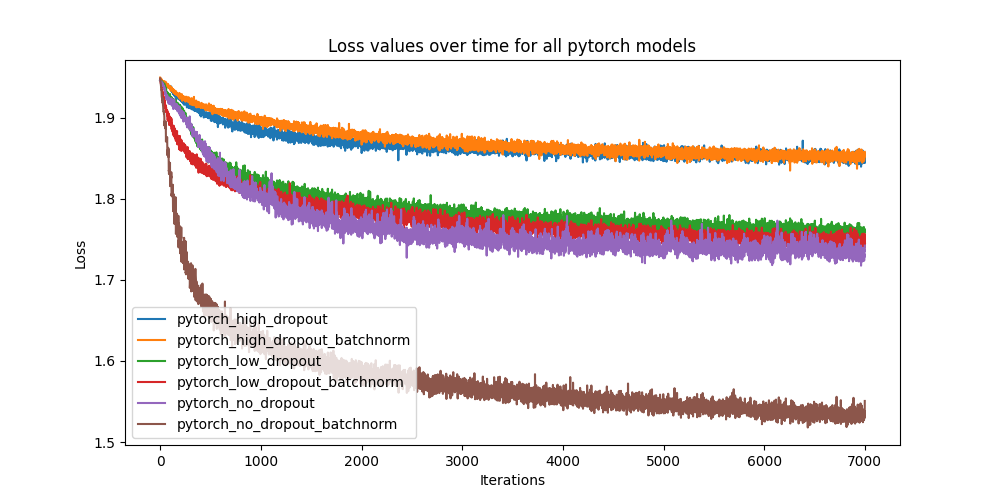

In [89]:
if len(loss_curves) > 0:
    f.pytorch_plot_all_loss_curves(
        loss_curves, os.path.join(parent_dir, 'reports', 'figures'))

Image(filename=os.path.join(parent_dir, 'reports',
      'figures', 'pytorch_all_models_loss_curve.png'))

Given the loss function above for all models and the accuracy obtained here, we can see that dropout actually made our performance worse:  The models with high dropout were able to learn far less and remained with a very high loss value, whereas the model with no dropout and using batchnorm managed to perform far better than the other models, despite also performing objectively poorly.

## **Conclusions**

The results of these tests are quite promising: While the maximum accuracy and F1 score achieved were ~47% with the random forest model, this is impressive considering we have 7 classes to predict in this multi-class classification problem: We are greatly outperforming the 1/7 (14%) accuracy of a random guess.

From all the models tested, the tree-based models of decision tree and random forest far outperformed other models. Tree based models are well suited to the purely categorical features we have, and thus not only outperformed the Neural Network models in accuracy, but also trained much faster. In particular, the vanilla decision tree model was trained in 4 seconds and managed to outperform the gridsearch MLP model which was trained in ~6.5 hours.

Based on experimentation, it is reasonable to assume that given more time and analysis, further models can be trained on this dataset to yield higher levels of accuracy and F1 score than was found here. A simple feature selection run from scikit-learn managed to boost the performance of random forest from 40% to 47%, thus with more specialized modifications it is reasonable to assume that we can further improve these results. 

In the future, it would be good to test the data using `auto-sklearn` or a similar method. I was unable to use this due to compatability issues on MacOS/Windows, but it could be an interesting way to boost model performance in the future.

What this means for our data is that is is possible to predict, with greater than random accuracy, the most likely day in a month a person will end up in a vehicle accident based on a variety of factors. It is important to note that the dataset used in this experiment does not include other critical pieces of data such as location, traffic concentration and holidays which can be strong contributors in accidents. Nonetheless the relative success of these trained models on the data available are a good indicator that insurance companies, business owners and concerned citizens can use similar data to determine risk and make more informed decisions on their driving habits.


## **References**

[1]	D. Santos, J. Saias, P. Quaresma, and V. B. Nogueira, “Machine Learning Approaches to Traffic Accident Analysis and Hotspot Prediction,” Computers, vol. 10, no. 12, p. 157, Nov. 2021.

[2]	M. K. Islam, I. Reza, U. Gazder, R. Akter, Arifuzzaman, and M. M. Rahman, “Predicting Road Crash Severity Using Classifier Models and Crash Hotspots,” NATO Adv. Sci. Inst. Ser. E Appl. Sci., vol. 12, no. 22, p. 11354, Nov. 2022.

[3]	“National Collision Database.” [Online]. Available: https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a. [Accessed: Feb. 14, 2023]

[4] P. Zhou, J. Feng, C. Ma, C. Xiong, S. HOI, and W. E, “Towards Theoretically Understanding Why SGD Generalizes Better Than ADAM in Deep Learning,” NeurIPS Proceedings, 2020. [Online]. Available: https://proceedings.neurips.cc/paper/2020/file/f3f27a324736617f20abbf2ffd806f6d-Paper.pdf. [Accessed: 30-Mar-2023]. 

[5] “1.13. feature selection,” scikit-learn, Mar-2023. [Online]. Available: https://scikit-learn.org/stable/modules/feature_selection.html. [Accessed: 30-Mar-2023]. 
